In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.utils import resample
from scipy.stats import chisquare
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from sklearn import feature_selection
import scipy.stats as st
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
null_values = df.isna().sum()
null_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
duplicate_values = df.duplicated().sum()
duplicate_values

np.int64(0)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df['tenure'].value_counts().head()

tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

In [ ]:
df_dtypes = df.apply(lambda x: x.dtype).value_counts()
df_dtypes

object     18
int64       2
float64     1
Name: count, dtype: int64

In [ ]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.replace(',', '')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
invalid_rows = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
invalid_rows

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [ ]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)


In [ ]:
df['SeniorCitizen'].value_counts().head()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [ ]:
numeric_summary = df.describe()
numeric_summary

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

##**EDA**

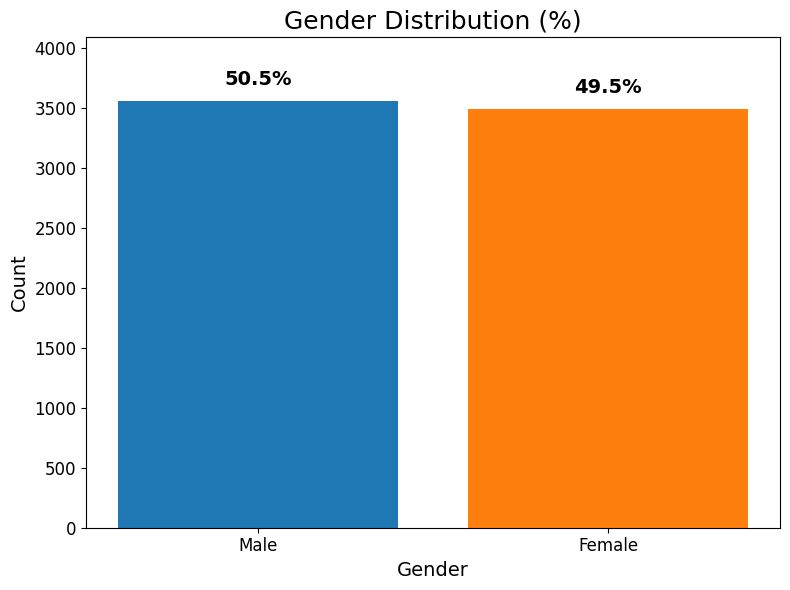

In [ ]:
import matplotlib.pyplot as plt

counts = df['gender'].value_counts()
percentages = counts / counts.sum() * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e'])

plt.title('Gender Distribution (%)', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

for bar, pct in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=14, fontweight='bold')


plt.ylim(0, counts.max() * 1.15)

plt.tight_layout()
plt.show()


<ipython-input-43-065d94a9bab3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=colors)


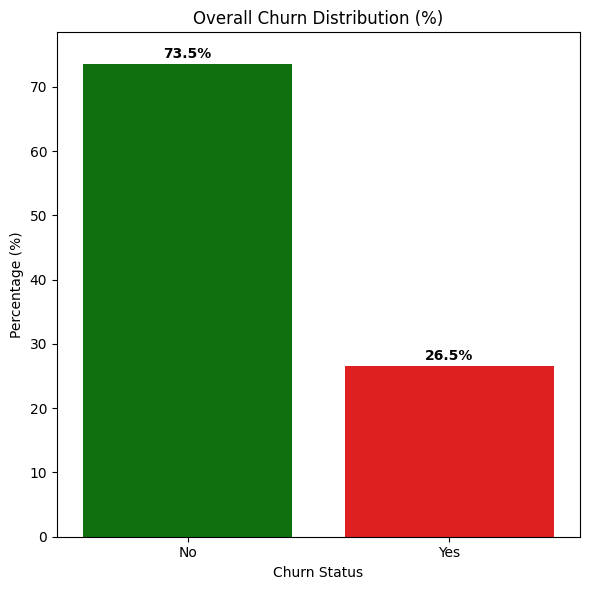

In [ ]:

churn_rate = df['Churn'].value_counts(normalize=True) * 100

colors = ['green' if label == 'No' else 'red' for label in churn_rate.index]


plt.figure(figsize=(6, 6))
ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=colors)
plt.title("Overall Churn Distribution (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Churn Status")


for i, val in enumerate(churn_rate.values):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, max(churn_rate.values) + 5)
plt.tight_layout()
plt.show()


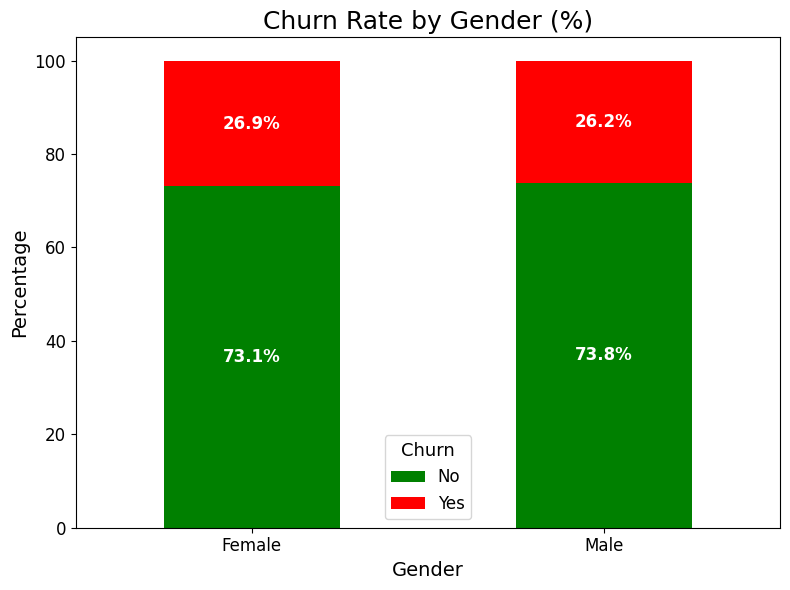

In [ ]:
import matplotlib.pyplot as plt

churn_gender = df.groupby(['gender', 'Churn']).size().unstack()

churn_gender_pct = churn_gender.div(churn_gender.sum(axis=1), axis=0) * 100

churn_gender_pct.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))
plt.title('Churn Rate by Gender (%)', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Churn", fontsize=12, title_fontsize=13)

for i, gender in enumerate(churn_gender_pct.index):
    for j, churn_status in enumerate(churn_gender_pct.columns):
        pct = churn_gender_pct.loc[gender, churn_status]
        if pct > 2:
            plt.text(i, churn_gender_pct.iloc[i,:j+1].sum() - pct/2, f"{pct:.1f}%",
                     ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


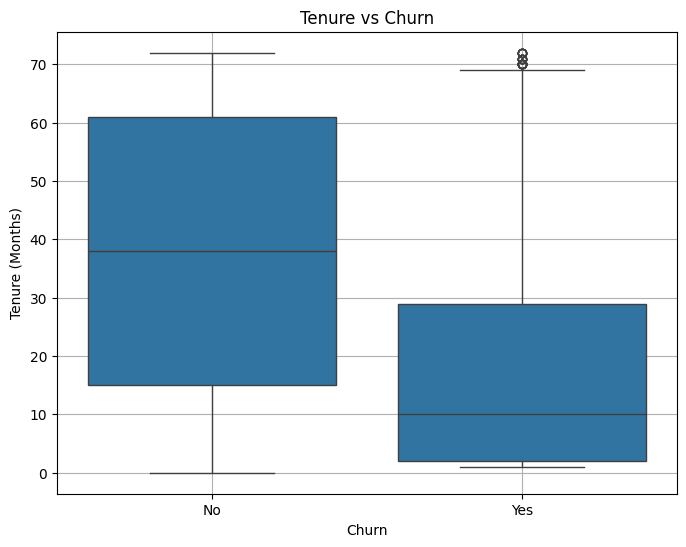

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.grid(True)
plt.show()


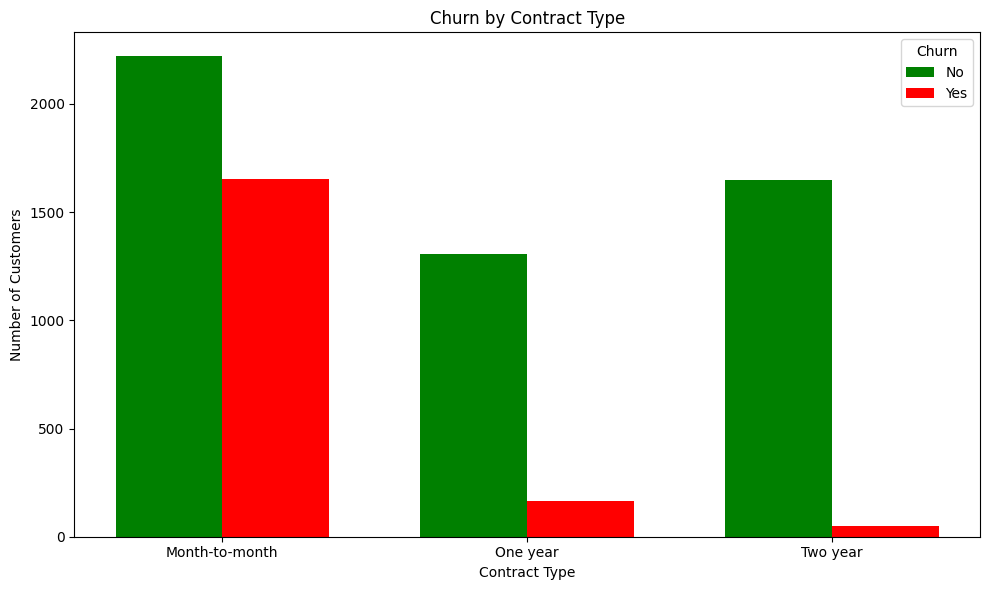

In [ ]:
import matplotlib.pyplot as plt

contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = range(len(contract_churn.index))

bars_no = ax.bar([i - bar_width/2 for i in index], contract_churn['No'], bar_width, label='No', color='green')
bars_yes = ax.bar([i + bar_width/2 for i in index], contract_churn['Yes'], bar_width, label='Yes', color='red')

ax.set_xlabel('Contract Type')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn by Contract Type')
ax.set_xticks(index)
ax.set_xticklabels(contract_churn.index)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()


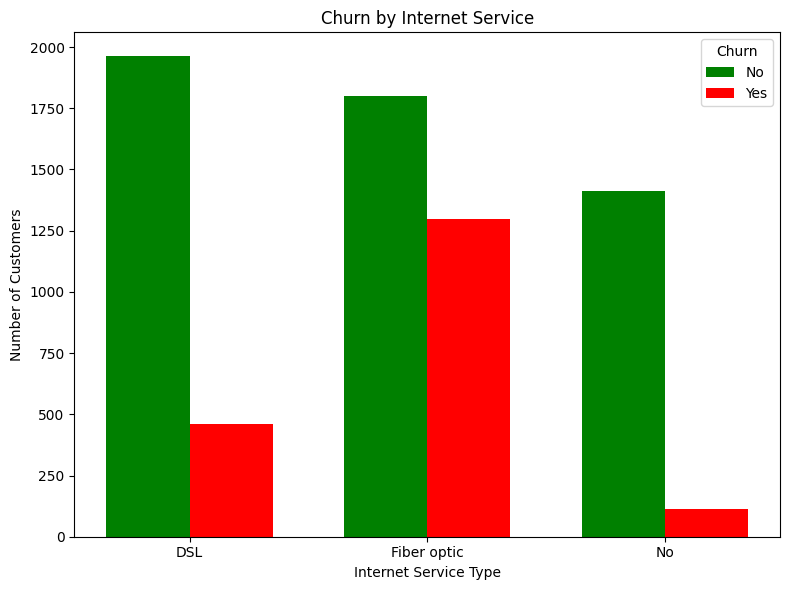

In [ ]:
import matplotlib.pyplot as plt

internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack()

# Bar plot
fig, ax = plt.subplots(figsize=(8,6))

bar_width = 0.35
index = range(len(internet_churn.index))

bars_no = ax.bar([i - bar_width/2 for i in index], internet_churn['No'], bar_width, label='No', color='green')
bars_yes = ax.bar([i + bar_width/2 for i in index], internet_churn['Yes'], bar_width, label='Yes', color='red')

ax.set_xlabel('Internet Service Type')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn by Internet Service')
ax.set_xticks(index)
ax.set_xticklabels(internet_churn.index)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()


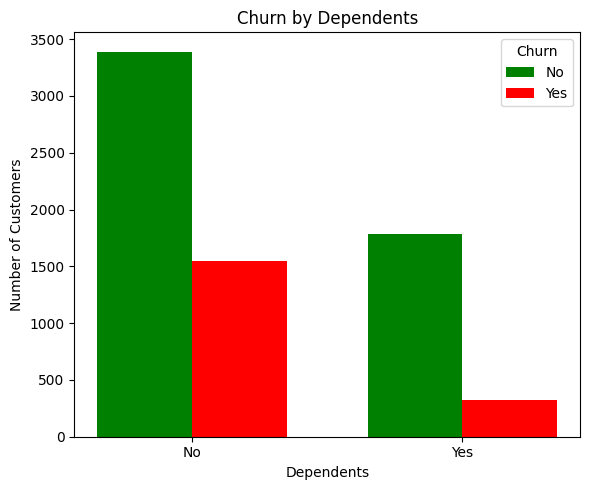

In [ ]:
import matplotlib.pyplot as plt

dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack()

fig, ax = plt.subplots(figsize=(6,5))

bar_width = 0.35
index = range(len(dependents_churn.index))

bars_no = ax.bar([i - bar_width/2 for i in index], dependents_churn['No'], bar_width, label='No', color='green')
bars_yes = ax.bar([i + bar_width/2 for i in index], dependents_churn['Yes'], bar_width, label='Yes', color='red')

ax.set_xlabel('Dependents')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn by Dependents')
ax.set_xticks(index)
ax.set_xticklabels(dependents_churn.index)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()


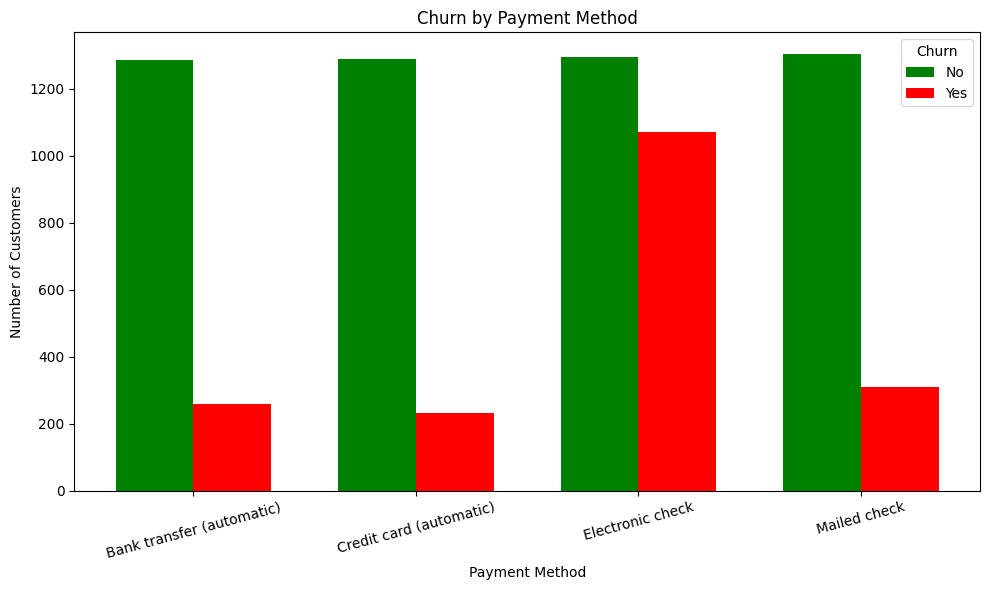

In [ ]:
import matplotlib.pyplot as plt

payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = range(len(payment_churn.index))

bars_no = ax.bar([i - bar_width/2 for i in index], payment_churn['No'], bar_width, label='No', color='green')
bars_yes = ax.bar([i + bar_width/2 for i in index], payment_churn['Yes'], bar_width, label='Yes', color='red')

ax.set_xlabel('Payment Method')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn by Payment Method')
ax.set_xticks(index)
ax.set_xticklabels(payment_churn.index, rotation=15)
ax.legend(title='Churn')

plt.tight_layout()
plt.show()


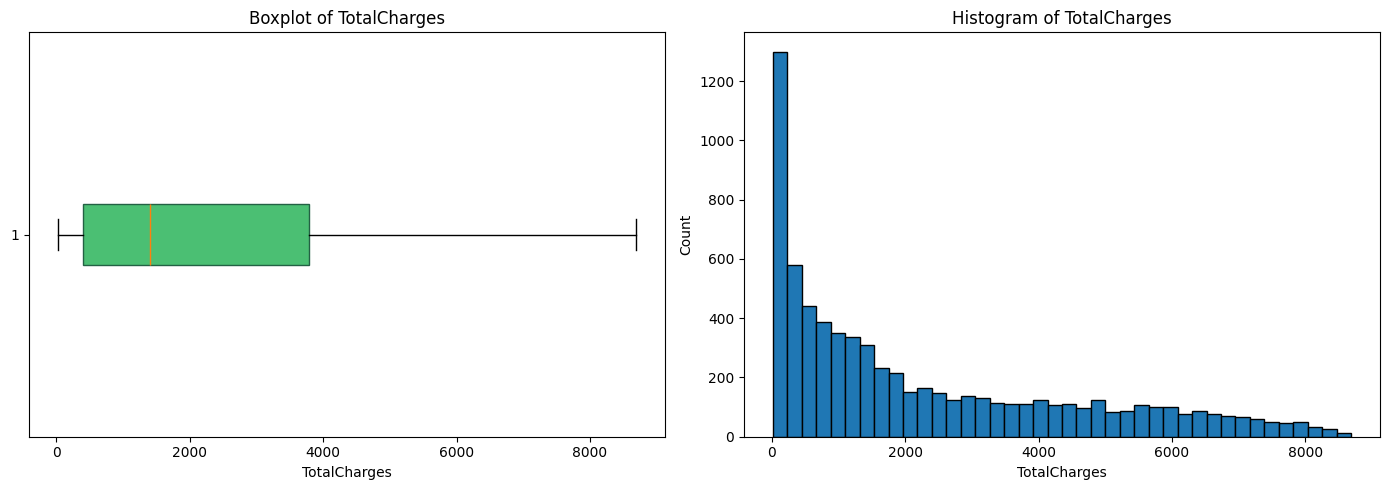

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(df['TotalCharges'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='#4bbf73', color='#236144'))
axes[0].set_title('Boxplot of TotalCharges')
axes[0].set_xlabel('TotalCharges')

axes[1].hist(df['TotalCharges'].dropna(), bins=40, color='#1f77b4', edgecolor='black')
axes[1].set_title('Histogram of TotalCharges')
axes[1].set_xlabel('TotalCharges')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


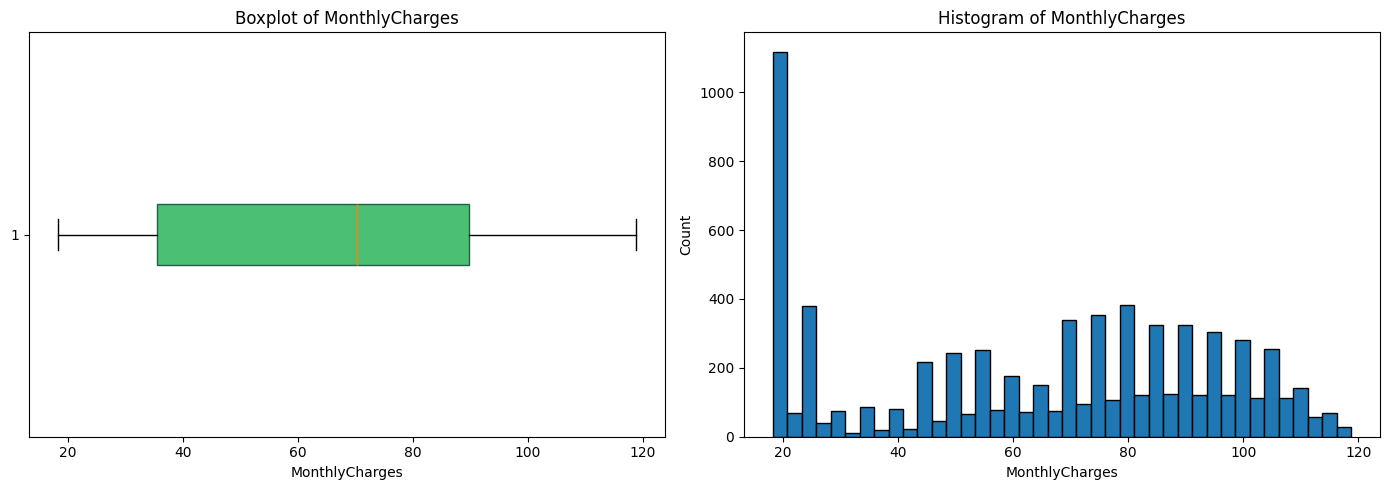

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(df['MonthlyCharges'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='#4bbf73', color='#236144'))
axes[0].set_title('Boxplot of MonthlyCharges')
axes[0].set_xlabel('MonthlyCharges')

axes[1].hist(df['MonthlyCharges'].dropna(), bins=40, color='#1f77b4', edgecolor='black')
axes[1].set_title('Histogram of MonthlyCharges')
axes[1].set_xlabel('MonthlyCharges')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


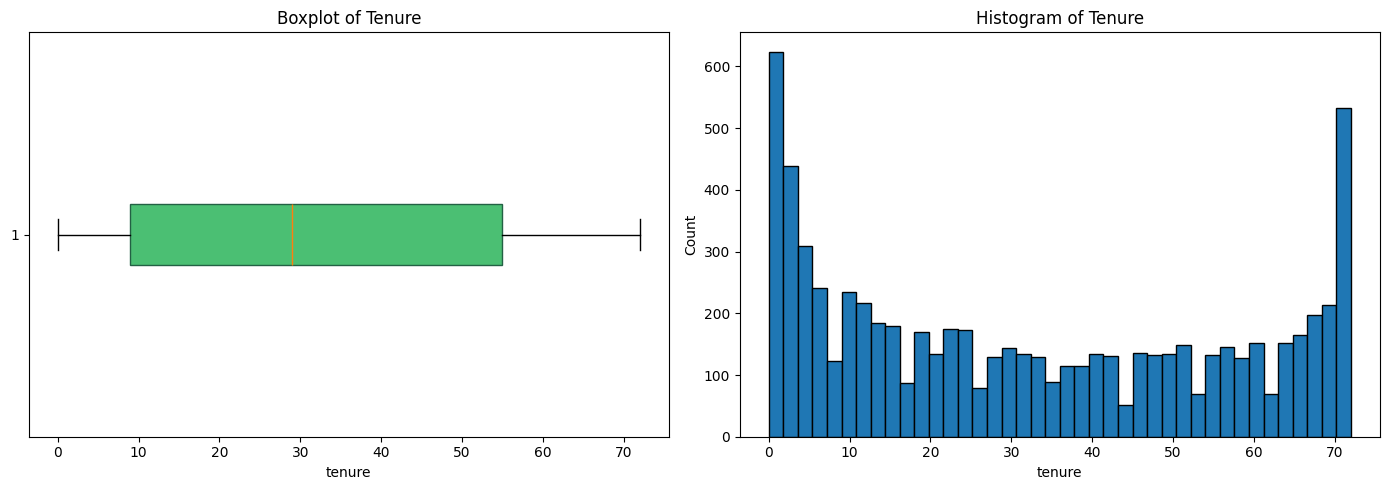

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(df['tenure'].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='#4bbf73', color='#236144'))
axes[0].set_title('Boxplot of Tenure')
axes[0].set_xlabel('tenure')

axes[1].hist(df['tenure'].dropna(), bins=40, color='#1f77b4', edgecolor='black')
axes[1].set_title('Histogram of Tenure')
axes[1].set_xlabel('tenure')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



<Figure size 800x600 with 0 Axes>

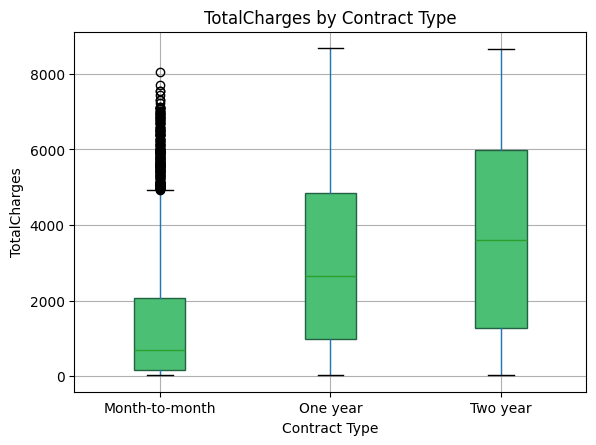

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column='TotalCharges', by='Contract', patch_artist=True,
           boxprops=dict(facecolor='#4bbf73', color='#236144'))
plt.title('TotalCharges by Contract Type')
plt.suptitle("")
plt.xlabel('Contract Type')
plt.ylabel('TotalCharges')
plt.show()


In [ ]:
print(df['Churn'].isnull().sum())

7043


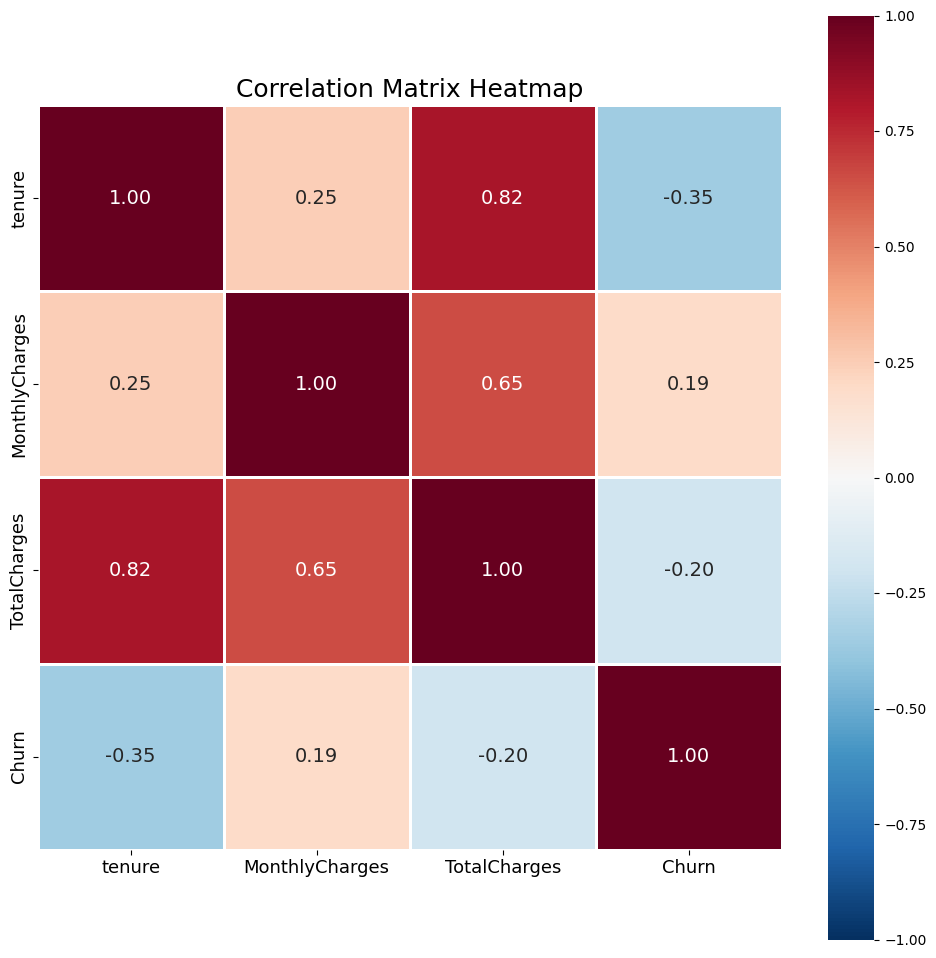

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr = df[corr_cols].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, square=True, linewidths=2,
            annot_kws={"size": 14}, fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85      0  
1               Mailed check          56.95       1889.50      0  
2               Mailed check          53.85        108.15      1  
3  Bank transfer (automatic)          42.30       1840.75      0  
4           Electronic check          70.70        151.65      1  

[5 rows x 21 columns]

In [ ]:
df4 = df.copy()

In [ ]:
df4.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85      0  
1               Mailed check          56.95       1889.50      0  
2               Mailed check          53.85        108.15      1  
3  Bank transfer (automatic)          42.30       1840.75      0  
4           Electronic check          70.70        151.65      1  

[5 rows x 21 columns]

In [ ]:
cat_cols = [col for col in df4.columns
            if df4[col].dtype == "object"
            and col not in ['Churn', 'TotalCharges']]

for col in cat_cols:
    df4[col] = df4[col].replace({'Yes': 1, 'No': 0})

<ipython-input-11-eb3cf5c40e97>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4[col] = df4[col].replace({'Yes': 1, 'No': 0})


In [ ]:
df4.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL              0  ...   
1             1                 0             DSL              1  ...   
2             1                 0             DSL              1  ...   
3             0  No phone service             DSL              1  ...   
4             1                 0     Fiber optic              0  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                0           0           0               0  Month-to-month   
1                1           0           0               0        One year   
2                0           0           0               0  Month-to-month   
3                1           1           0               0        One year   
4                0           0           0               0  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check          29.85         29.85   
1                0               Mailed check          56.95       1889.50   
2                1               Mailed check          53.85        108.15   
3                0  Bank transfer (automatic)          42.30       1840.75   
4                1           Electronic check          70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 21 columns]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

if 'customerID' in df4.columns:
    df4 = df4.drop(columns=['customerID'])

X = df4.drop('Churn', axis=1)
y = df4['Churn']

cat_cols = X.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


Accuracy: 0.7864
F1 Score: 0.5514

Confusion Matrix:
[[923 112]
 [189 185]]

Classification Report:
              precision    recall  f1-score   support

           0      0.830     0.892     0.860      1035
           1      0.623     0.495     0.551       374

    accuracy                          0.786      1409
   macro avg      0.726     0.693     0.706      1409
weighted avg      0.775     0.786     0.778      1409



In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

name = "Random Forest Results"

print(f"########## {name} ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")



########## Random Forest Results ##########
Accuracy: 0.7864
AUC: 0.8188
Recall: 0.4947
Precision: 0.6229
F1: 0.5514


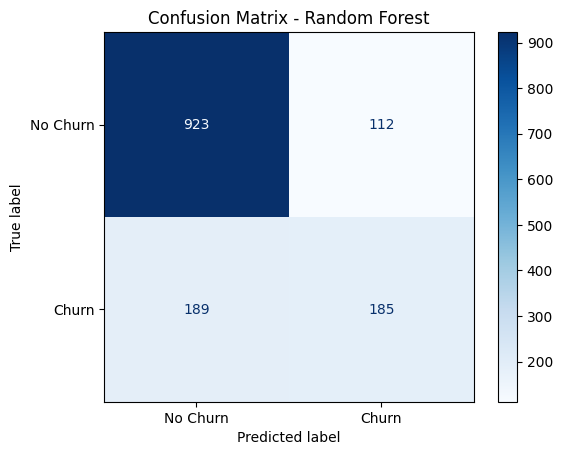

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


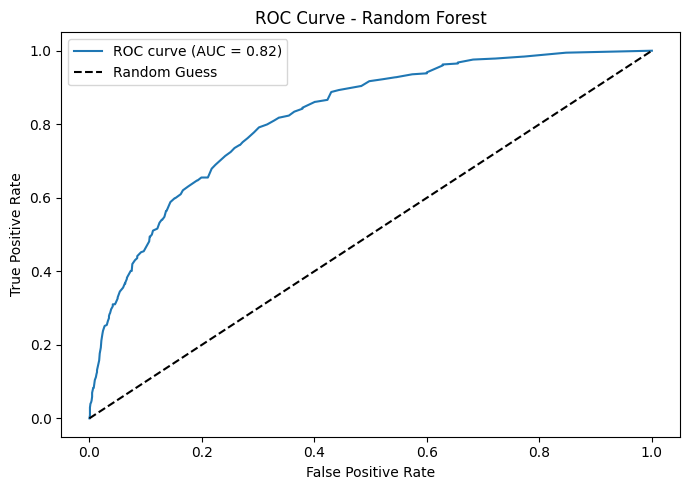

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = rf.predict_proba(X_test)[:, list(rf.classes_).index(1)]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


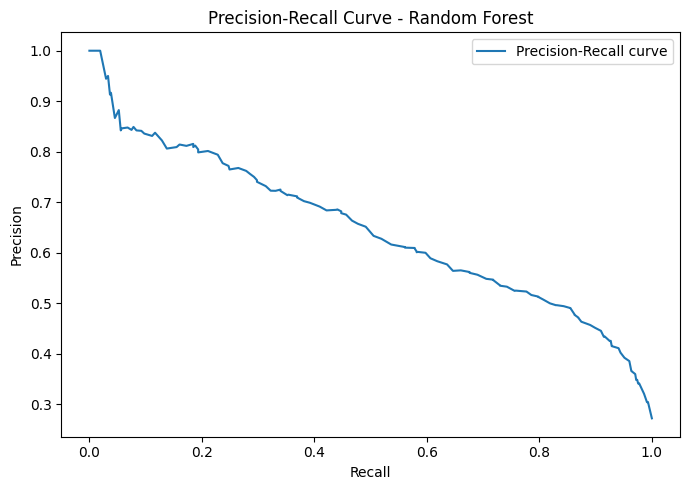

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


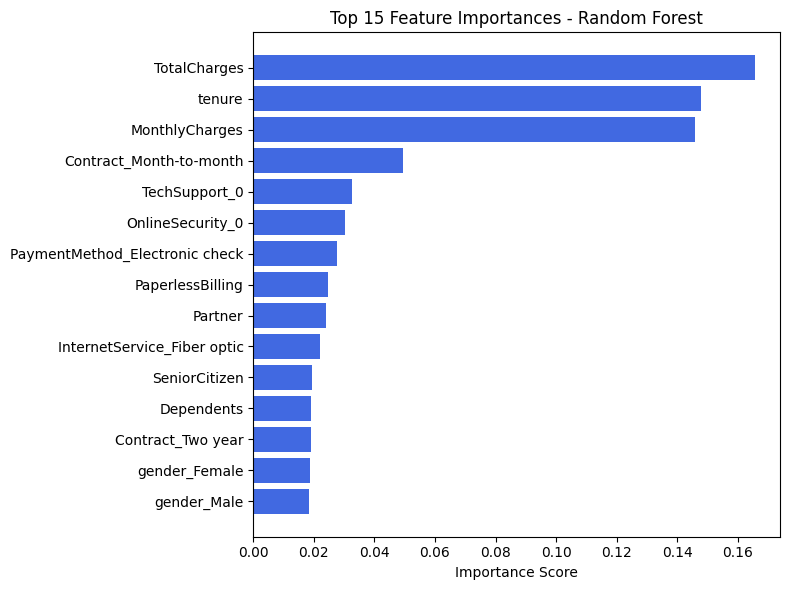

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

feature_names = X_train.columns

importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 15
feat_imp_top = feat_imp.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp_top['Feature'][::-1], feat_imp_top['Importance'][::-1], color='royalblue')
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_proba_knn)

name = "K-Nearest Neighbors Results"

print(f"########## {name} ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")


########## K-Nearest Neighbors Results ##########
Accuracy: 0.7495
AUC: 0.7663
Recall: 0.5107
Precision: 0.5291
F1: 0.5197


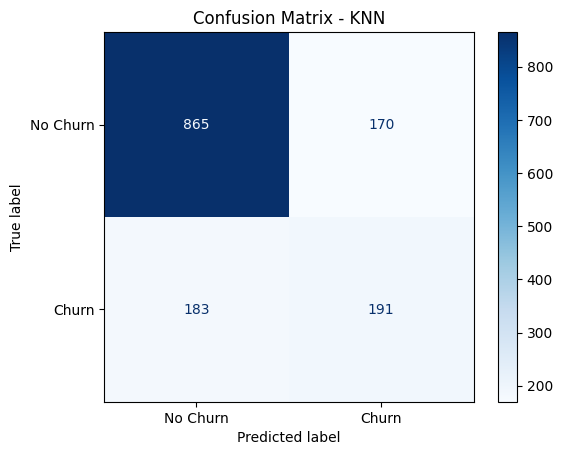

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    knn, X_test_scaled, y_test, display_labels=["No Churn", "Churn"], cmap='Blues'
)
plt.title("Confusion Matrix - KNN")
plt.show()


In [ ]:
print(y_test.value_counts())


Churn
0    1035
1     374
Name: count, dtype: int64


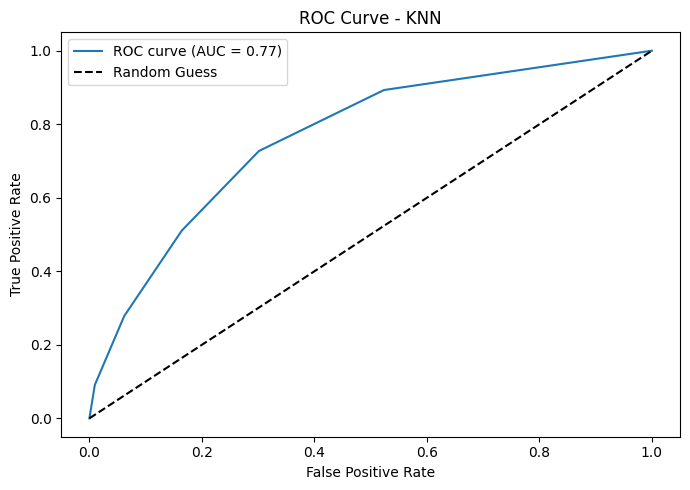

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.tight_layout()
plt.show()


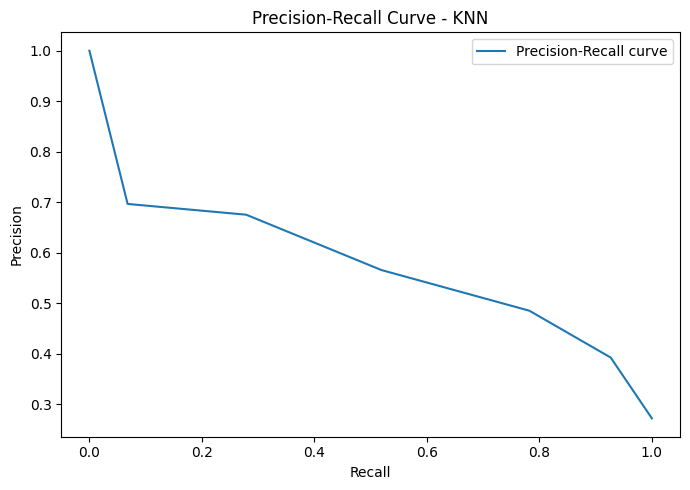

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_knn)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler



dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_proba_dt)

print("########## Decision Tree Results ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")


########## Decision Tree Results ##########
Accuracy: 0.7317
AUC: 0.6511
Recall: 0.4786
Precision: 0.4945
F1: 0.4864


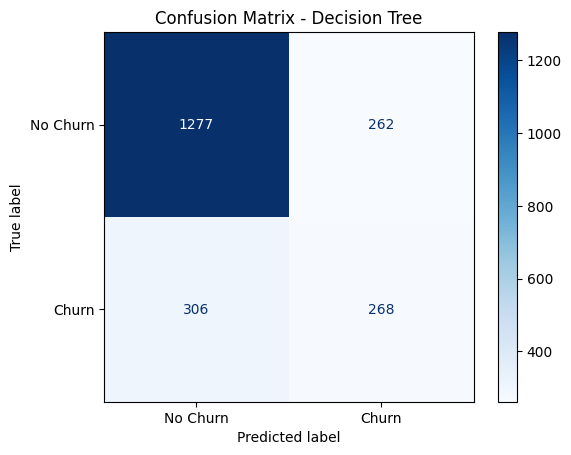

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    dt, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='Blues'
)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


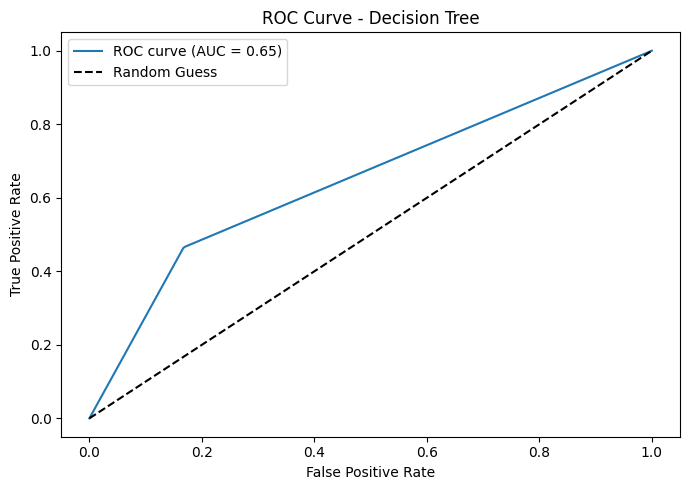

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba_dt = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()


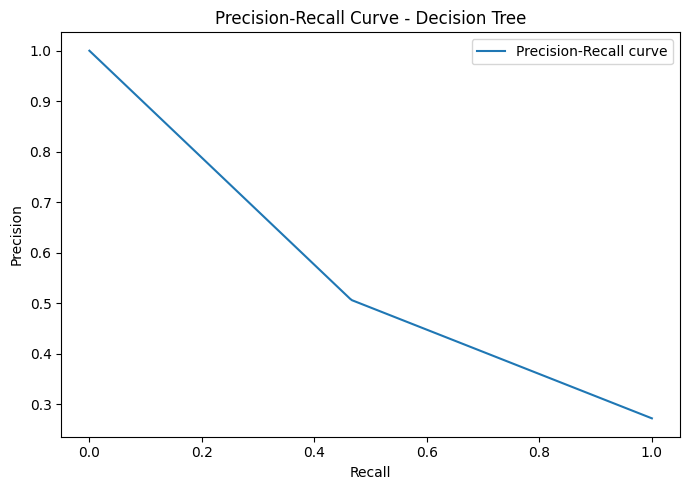

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_dt)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc = roc_auc_score(y_test, y_proba_lr)

print("########## Logistic Regression Results ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")

########## Logistic Regression Results ##########
Accuracy: 0.7402
AUC: 0.8411
Recall: 0.7861
Precision: 0.5069
F1: 0.6164


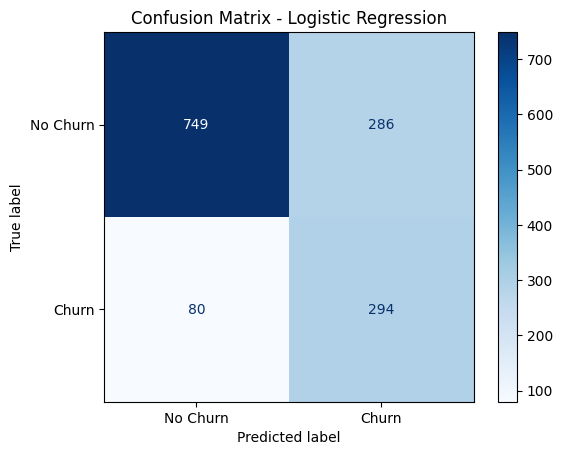

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    lr, X_test_scaled, y_test, display_labels=["No Churn", "Churn"], cmap='Blues'
)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


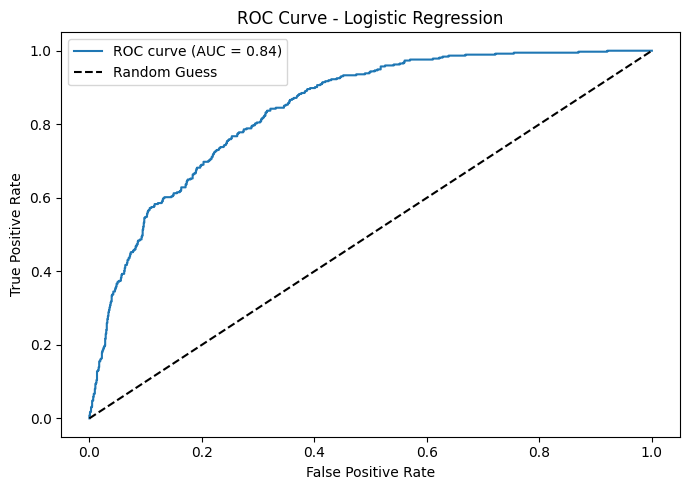

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()


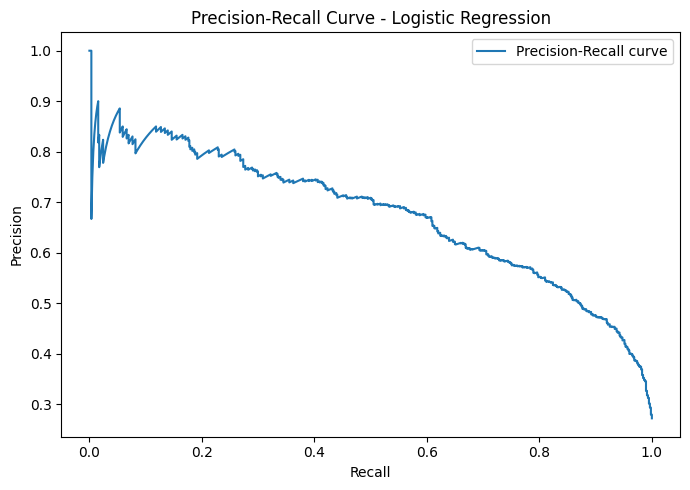

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

########## Gradient Boosting Results ##########
Accuracy: 0.8048
AUC: 0.8433
Recall: 0.5214
Precision: 0.6701
F1: 0.5865

Confusion Matrix:
[[939  96]
 [179 195]]

Classification Report:
              precision    recall  f1-score   support

           0      0.840     0.907     0.872      1035
           1      0.670     0.521     0.586       374

    accuracy                          0.805      1409
   macro avg      0.755     0.714     0.729      1409
weighted avg      0.795     0.805     0.796      1409



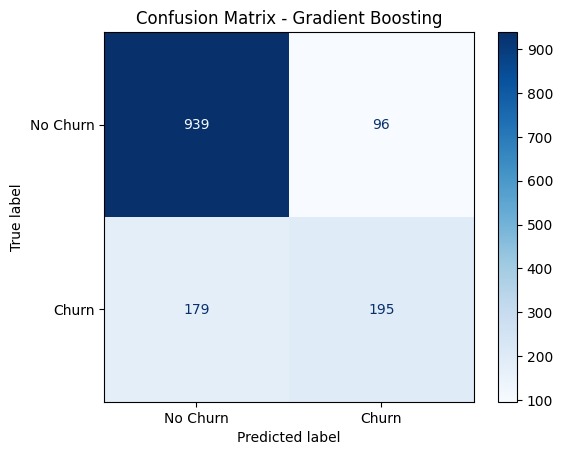

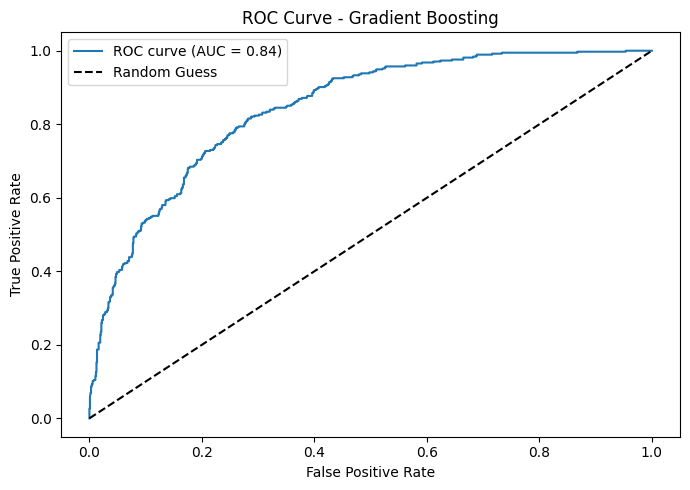

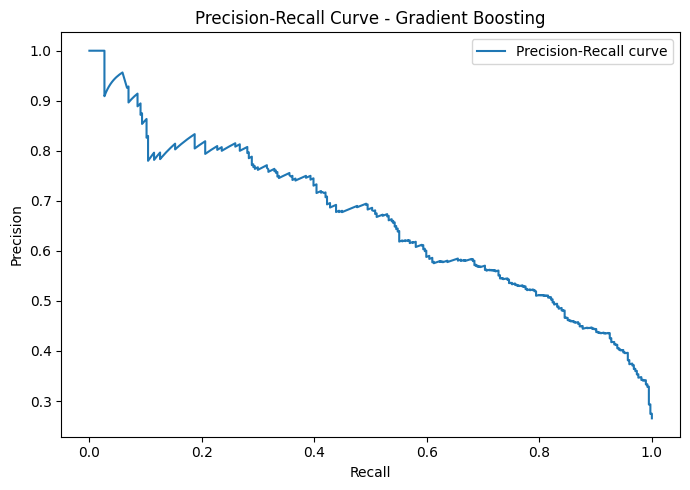

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)
y_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
auc_score = roc_auc_score(y_test, y_proba_gb)

print("########## Gradient Boosting Results ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, digits=3))

ConfusionMatrixDisplay.from_estimator(
    gb, X_test_scaled, y_test, display_labels=["No Churn", "Churn"], cmap='Blues'
)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba_gb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.tight_layout()
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_gb)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df4.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   
3    Male              0        0           0      45             0   
4  Female              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL              0            1   
1                 0             DSL              1            0   
2                 0             DSL              1            1   
3  No phone service             DSL              1            0   
4                 0     Fiber optic              0            0   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                0           0           0               0  Month-to-month   
1                1           0           0               0        One year   
2                0           0           0               0  Month-to-month   
3                1           1           0               0        One year   
4                0           0           0               0  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           29.85         29.85   
1                 0               Mailed check           56.95       1889.50   
2                 1               Mailed check           53.85        108.15   
3                 0  Bank transfer (automatic)           42.30       1840.75   
4                 1           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_bal, y_train_bal)

y_pred_gb = gb.predict(X_test_scaled)
y_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
auc_score = roc_auc_score(y_test, y_proba_gb)

print("########## Gradient Boosting + SMOTE Results ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, digits=3))


########## Gradient Boosting + SMOTE Results ##########
Accuracy: 0.7786
AUC: 0.8416
Recall: 0.6898
Precision: 0.5683
F1: 0.6232

Confusion Matrix:
[[839 196]
 [116 258]]

Classification Report:
              precision    recall  f1-score   support

           0      0.879     0.811     0.843      1035
           1      0.568     0.690     0.623       374

    accuracy                          0.779      1409
   macro avg      0.723     0.750     0.733      1409
weighted avg      0.796     0.779     0.785      1409



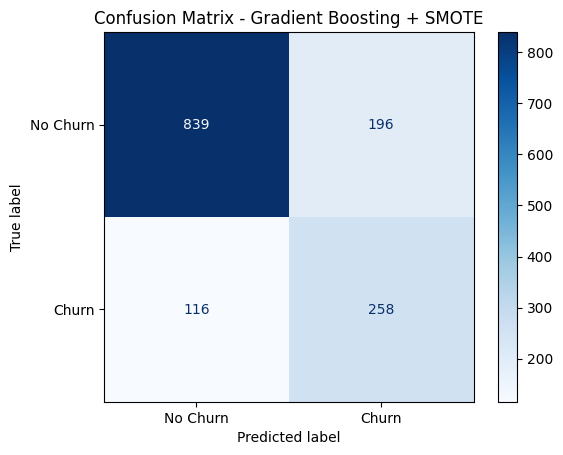

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    gb, X_test_scaled, y_test, display_labels=["No Churn", "Churn"], cmap='Blues'
)
plt.title("Confusion Matrix - Gradient Boosting + SMOTE")
plt.show()


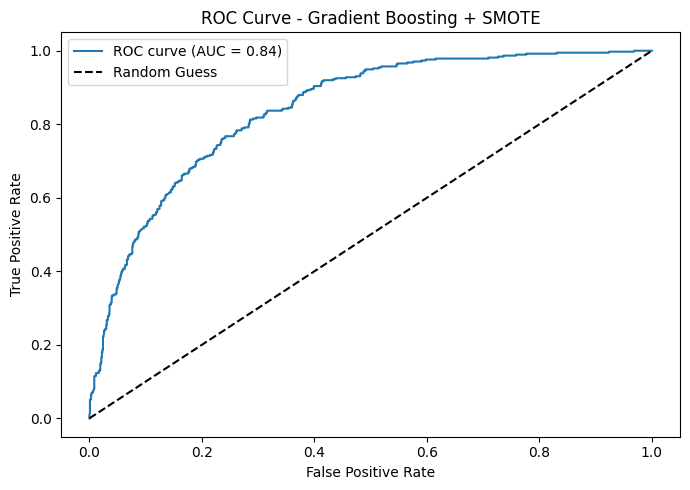

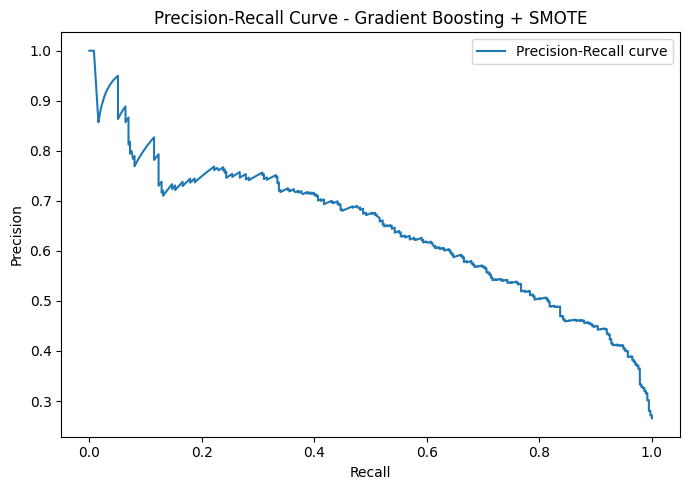

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting + SMOTE')
plt.legend()
plt.tight_layout()
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_gb)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting + SMOTE')
plt.legend()
plt.tight_layout()
plt.show()


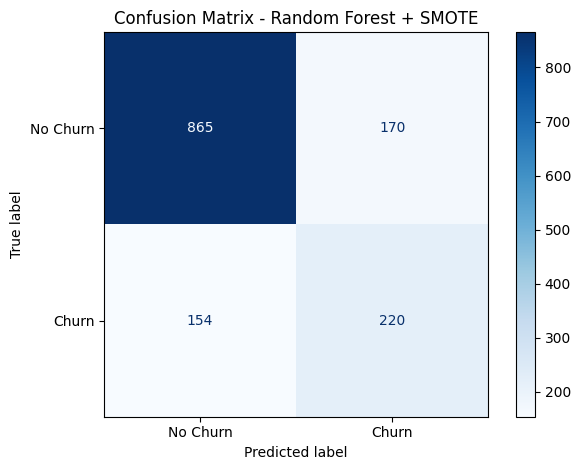

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test_scaled)

ConfusionMatrixDisplay.from_estimator(
    rf, X_test_scaled, y_test, display_labels=["No Churn", "Churn"], cmap='Blues'
)
plt.title("Confusion Matrix - Random Forest + SMOTE")
plt.tight_layout()
plt.show()


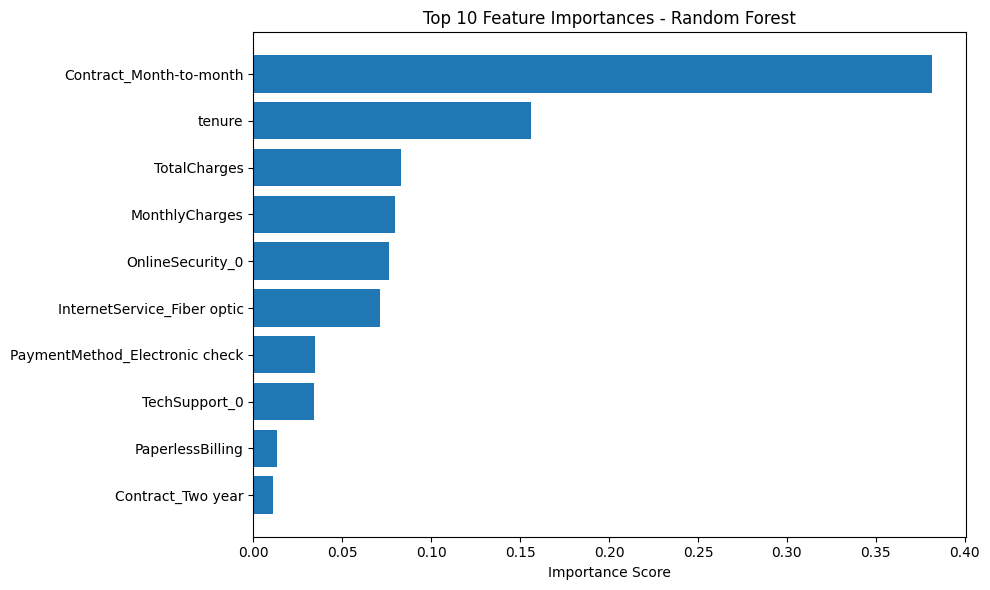

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_train.columns
importances = gb.feature_importances_

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'][:10][::-1], feat_imp['Importance'][:10][::-1])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test_scaled)
rf_classes = list(rf.classes_)
churn_index = rf_classes.index(1)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, churn_index]

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc_score = roc_auc_score(y_test, y_proba_rf)

print("########## Random Forest + SMOTE Results ##########")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=3))


########## Random Forest + SMOTE Results ##########
Accuracy: 0.7700
AUC: 0.8209
Recall: 0.5882
Precision: 0.5641
F1: 0.5759

Confusion Matrix:
[[865 170]
 [154 220]]

Classification Report:
              precision    recall  f1-score   support

           0      0.849     0.836     0.842      1035
           1      0.564     0.588     0.576       374

    accuracy                          0.770      1409
   macro avg      0.706     0.712     0.709      1409
weighted avg      0.773     0.770     0.772      1409



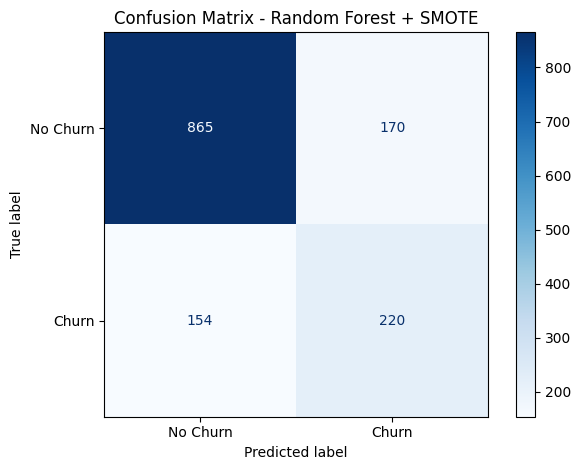

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest + SMOTE")
plt.tight_layout()
plt.show()


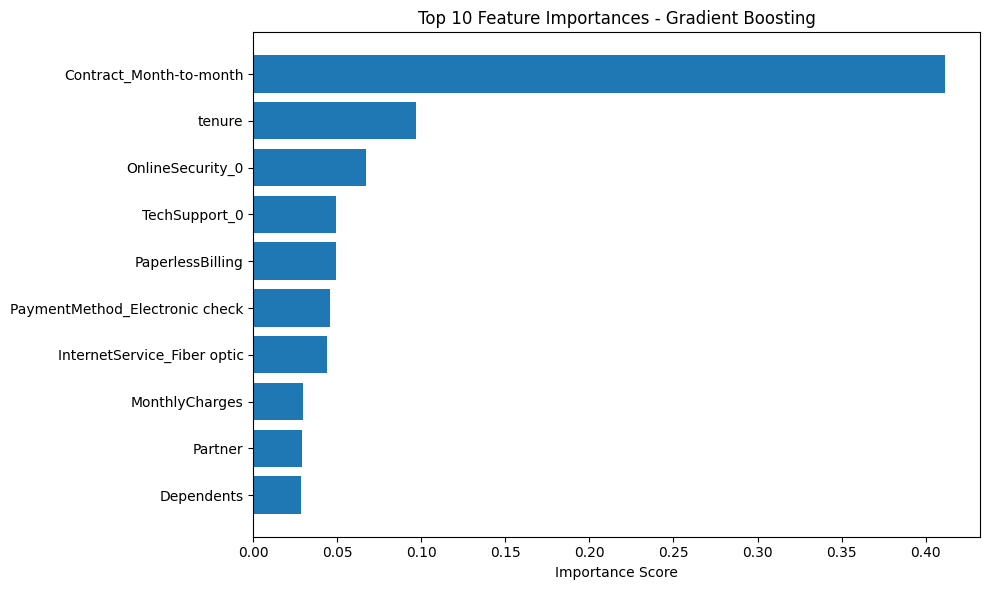

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = gb.feature_importances_
feature_names = X_train.columns

top_n = 10
indices = np.argsort(feature_importances)[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[indices], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices])
plt.xlabel("Importance Score")
plt.title(f"Top {top_n} Feature Importances - Gradient Boosting")
plt.tight_layout()
plt.show()


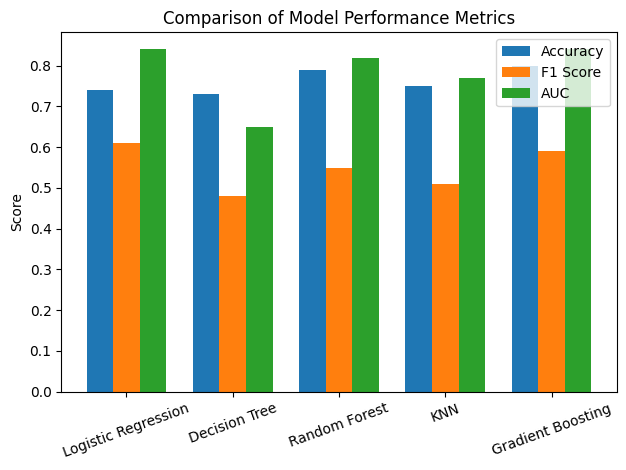

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting']
accuracies = [0.74, 0.73, 0.79, 0.75, 0.80]
f1_scores = [0.61, 0.48, 0.55, 0.51, 0.59]
auc_scores = [0.84, 0.65, 0.82, 0.77, 0.84]

x = np.arange(len(models))
width = 0.25

plt.bar(x - width, accuracies, width, label='Accuracy')
plt.bar(x, f1_scores, width, label='F1 Score')
plt.bar(x + width, auc_scores, width, label='AUC')

plt.xticks(x, models, rotation=20)
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()
